In [16]:
import random
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
    name:str
    numbers:list[int]
    counter:int

def greet(state:AgentState) -> AgentState:
    '''Greets given a name'''
    state['name'] = f"Hello {state['name']}, Welcome to the processing"
    state['counter'] = 0
    return state

def randomer(state:AgentState) -> AgentState:
    print(state['counter'])
    state['numbers'].append(random.randint(0, 20))
    state['counter'] = state['counter'] + 1
    return state

def should_continue_from_randomer(state:AgentState) -> AgentState:    
    if state['counter'] < 5:
        return "loop"
    else:
        return "end"
    
graph = StateGraph(AgentState)

graph.add_node("greet_node", greet)
graph.add_edge(START, "greet_node")

graph.add_node("random_node", lambda state:state)
graph.add_edge('greet_node', "random_node")
graph.add_conditional_edges(
    "random_node", 
    randomer,
    {
        "loop" : "random_node",
        "end" : END
    }
)

app = graph.compile()


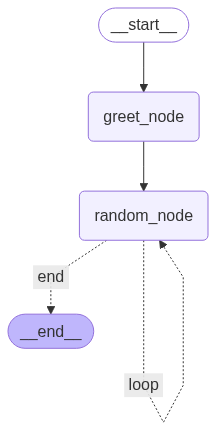

In [18]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
inp = AgentState(name="Suriya", numbers=[])
result = app.invoke(inp)
result

GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT